# Homework 3

# Coding Problems

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression, Perceptron, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, mean_absolute_error
from sklearn import preprocessing
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

## Spam Email Classifier

In [2]:
df = pd.read_csv('spam_data.csv')
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Classification
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[:,1:3001]
Y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8, test_size = 0.2,random_state = 10)

In [5]:
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5172
Number of rows in the training set: 4137
Number of rows in the test set: 1035


Accuracy of Logistic Regression classifier : 97.2947%


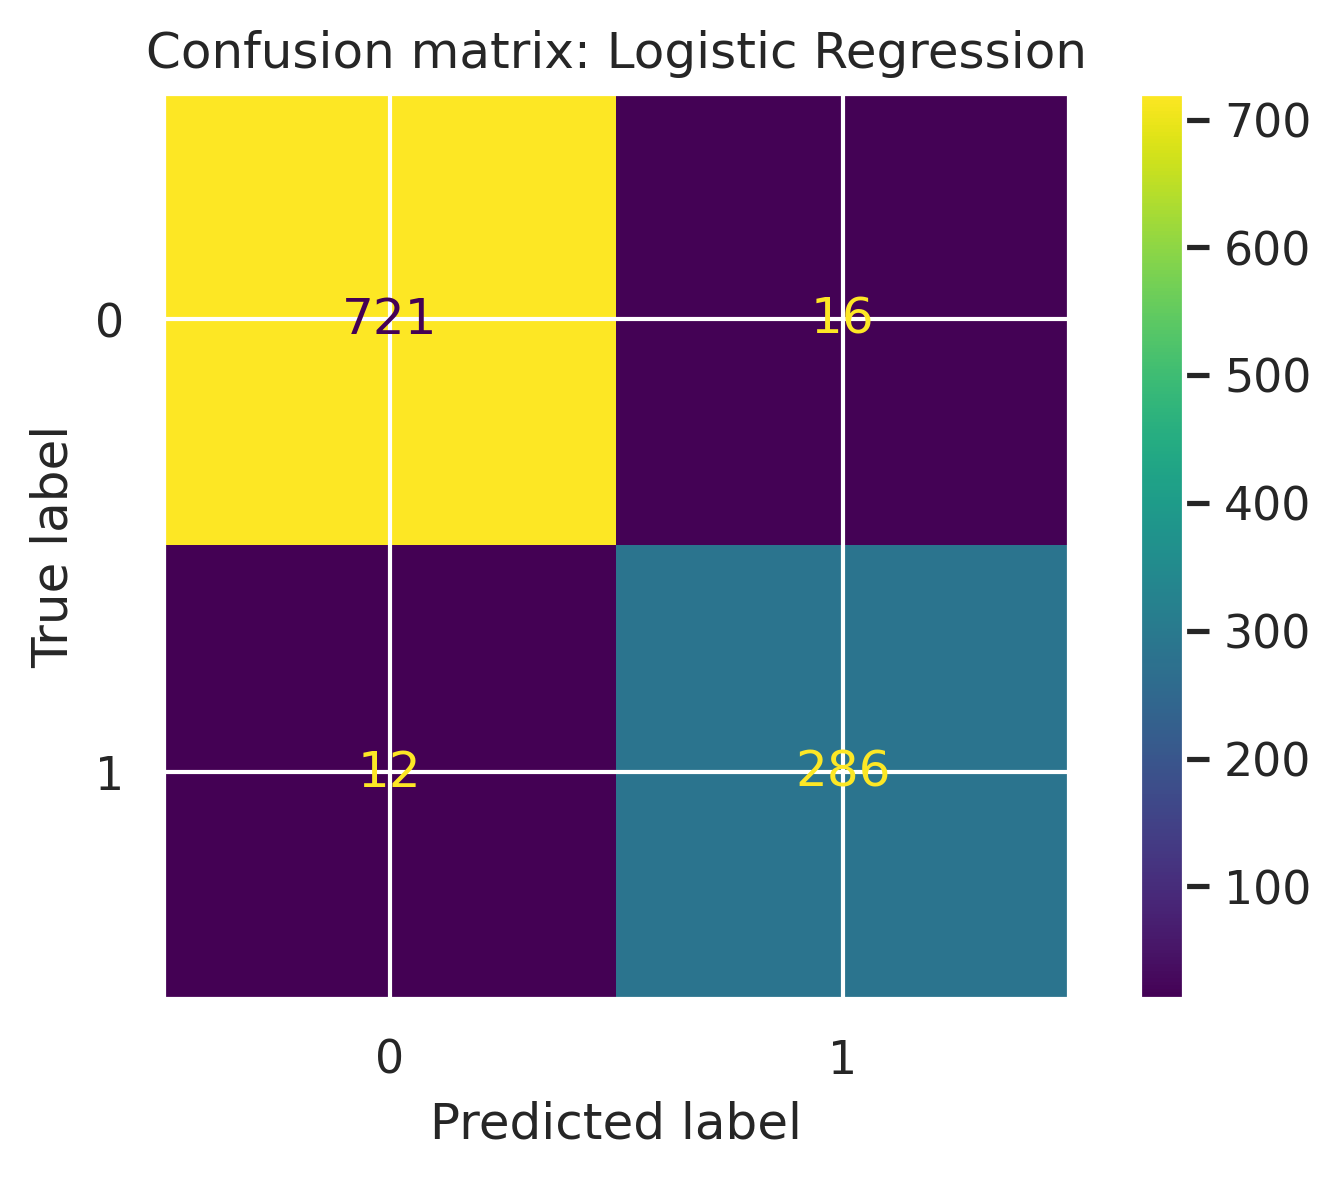

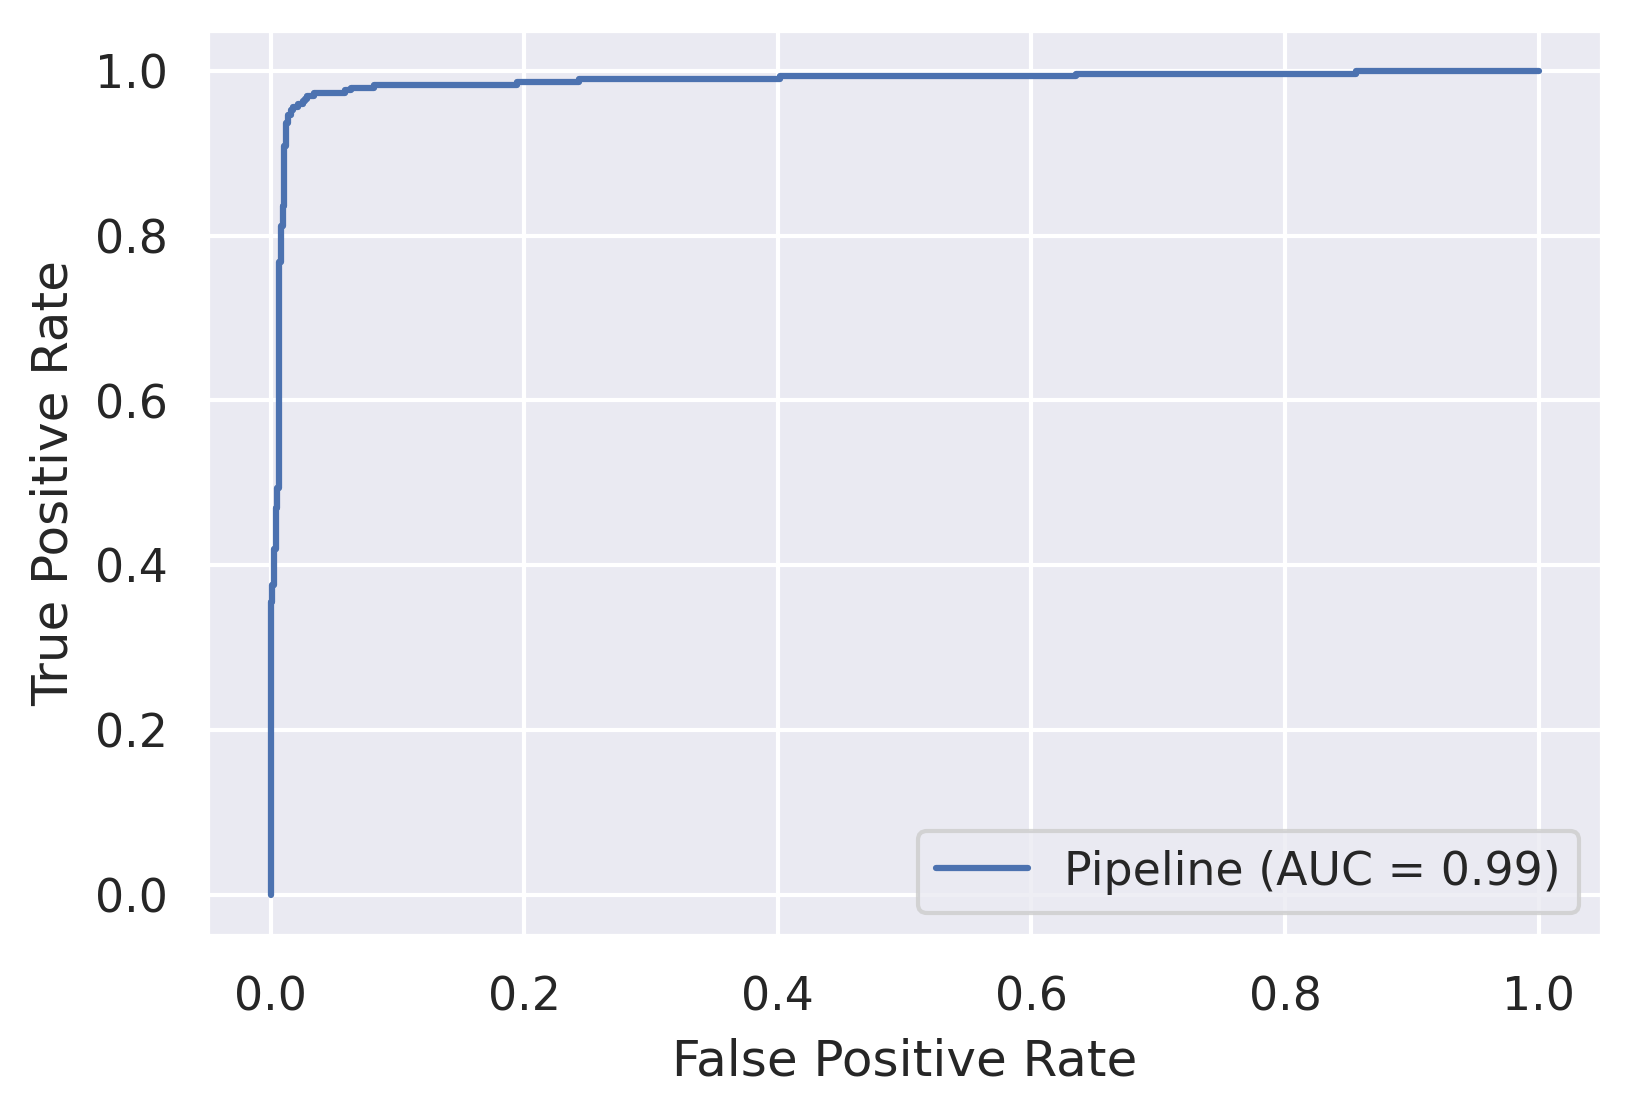

In [7]:
# Here I needed to increase the max_iter to 1000 from the default values 100 fix the warning
# ConvergenceWarning: lbfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
pipe = make_pipeline(LogisticRegression(max_iter=1000))
lr_clf_model = pipe.fit(X_train, y_train)  # apply scaling on training data
disp = plot_confusion_matrix(lr_clf_model, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Logistic Regression")
metrics.plot_roc_curve(lr_clf_model, X_test, y_test)
print("Accuracy of Logistic Regression classifier : {:.4f}%".format(pipe.score(X_test, y_test)*100))

Accuracy of MLP classifier : 97.4879%


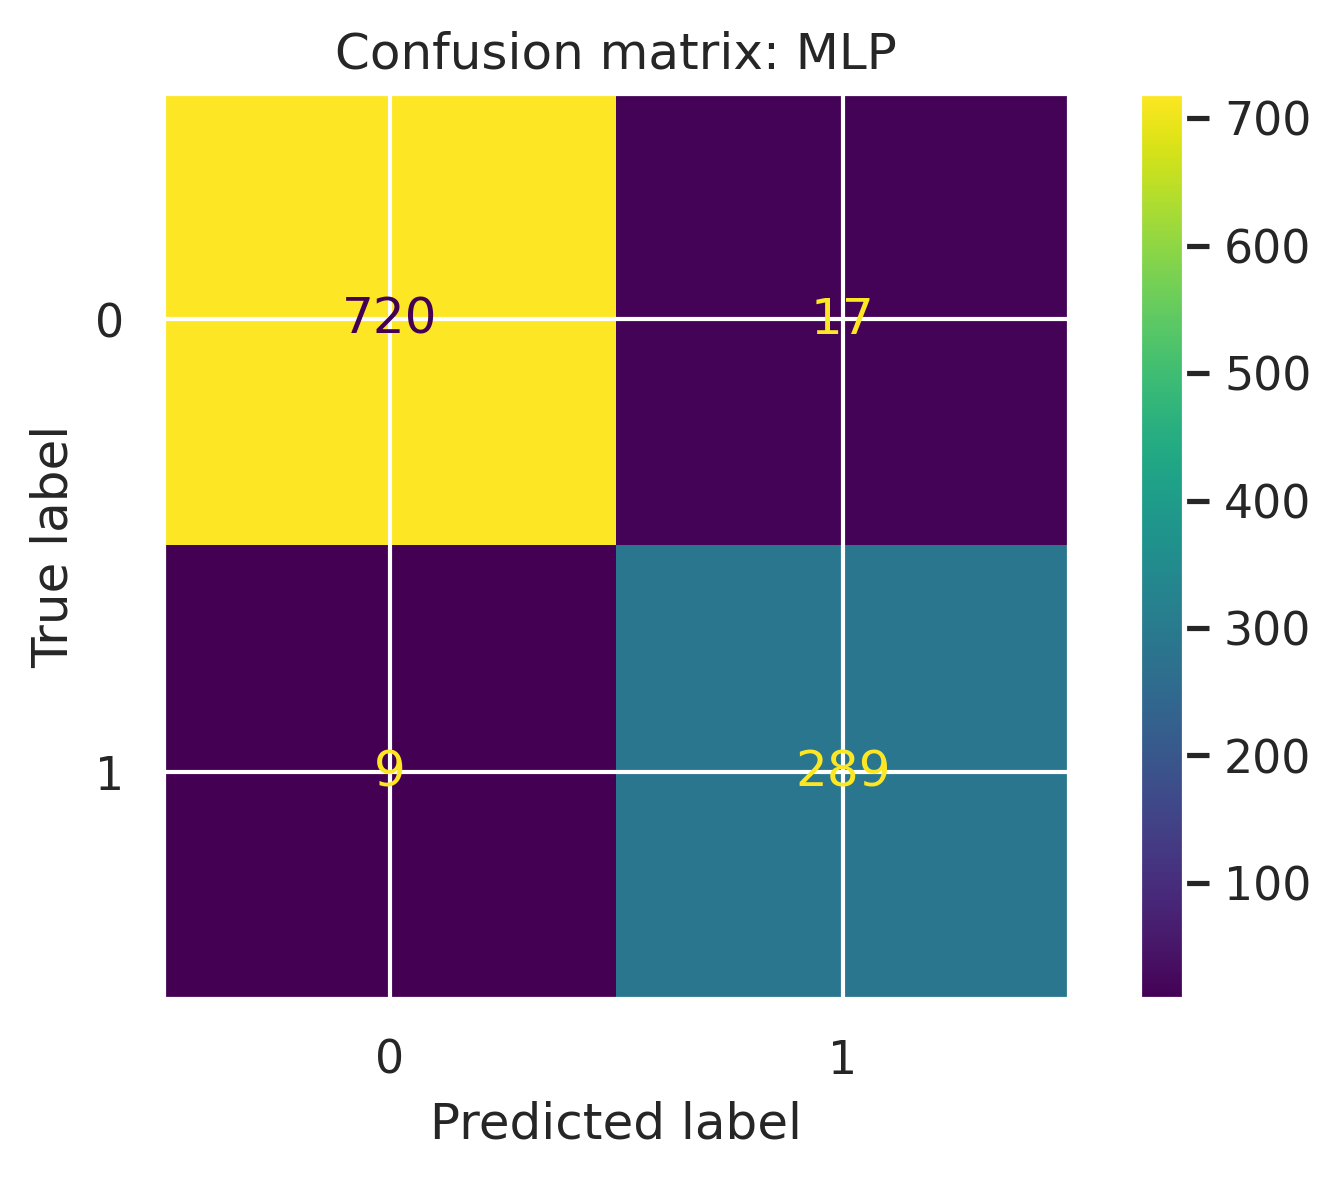

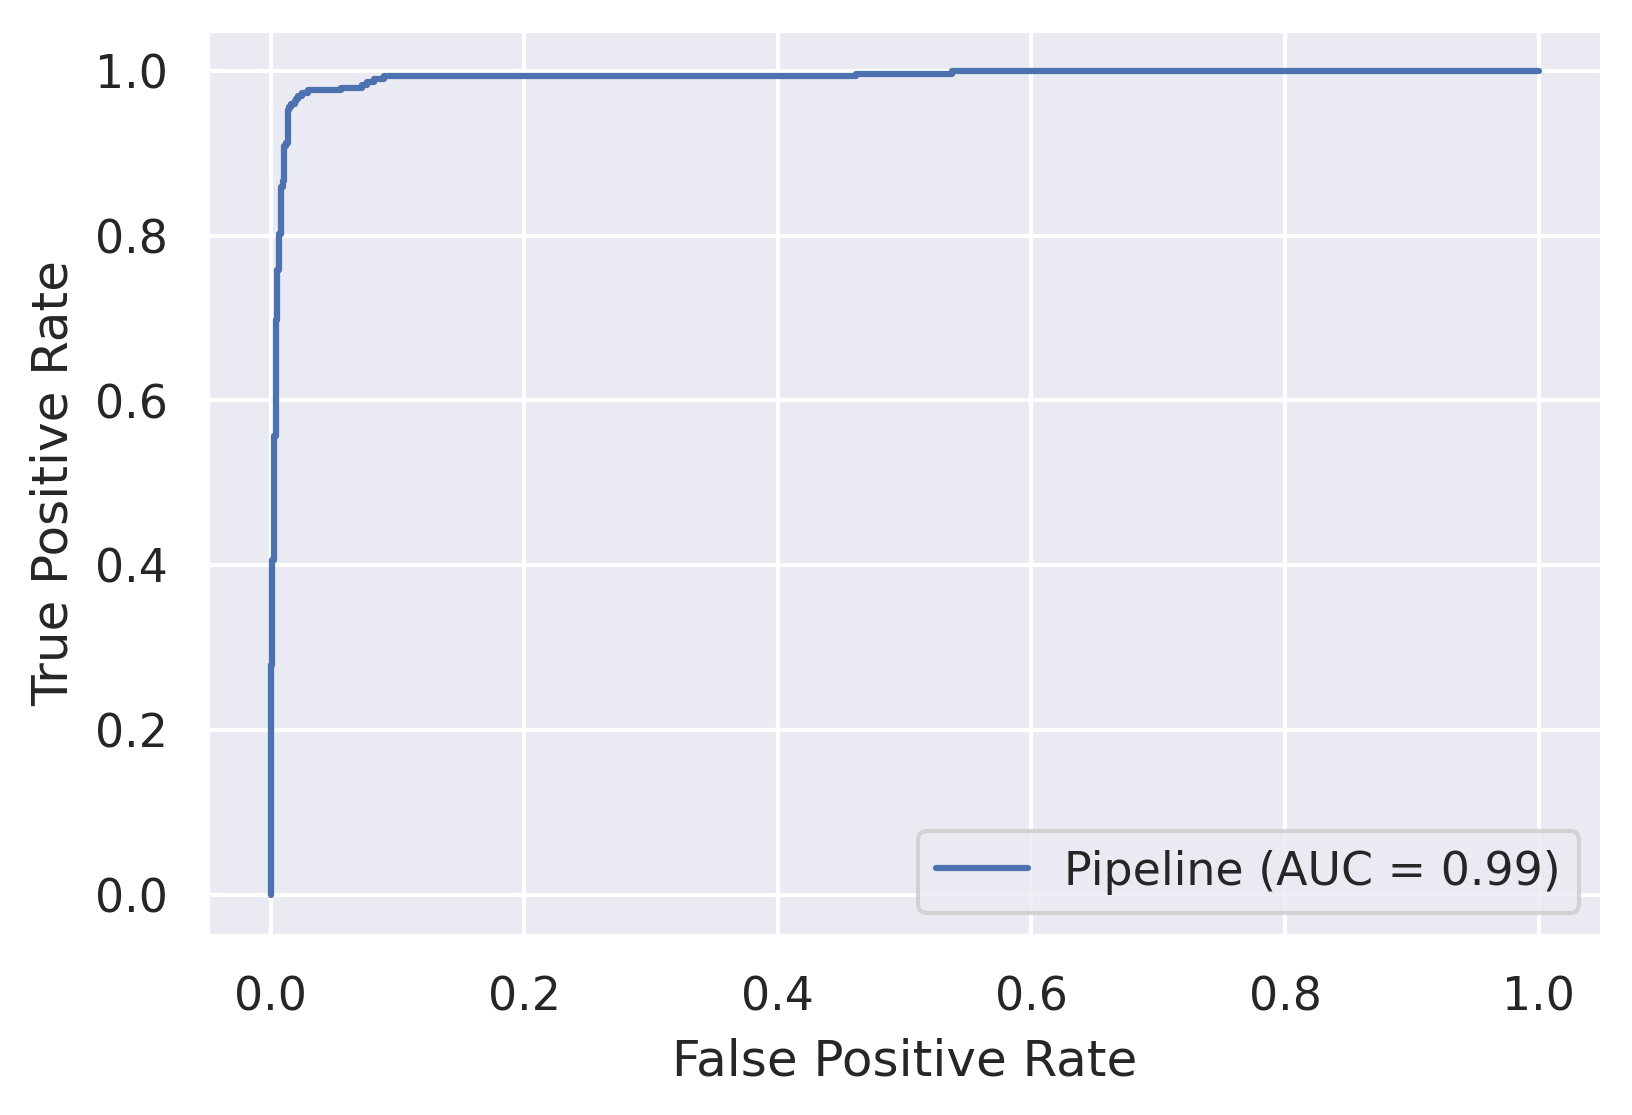

In [8]:
pipe = make_pipeline(MLPClassifier(hidden_layer_sizes=100, max_iter=300, activation='logistic',random_state=0))
pt_clf_model = pipe.fit(X_train, y_train)  # apply scaling on training data
disp = plot_confusion_matrix(pt_clf_model, X_test, y_test)
disp.ax_.set_title("Confusion matrix: MLP")
metrics.plot_roc_curve(pt_clf_model, X_test, y_test)
print("Accuracy of MLP classifier : {:.4f}%".format(pipe.score(X_test, y_test)*100))

**Which model is the better option for this dataset?**
I set the `max_iter=1000` for Logistic Regression Classifier and `max_iter=300` for MLP classifier. Obtained accuracies are as follows:
1. Logistic Regression: $97.2947\%$ 
2. MLP: $97.4879\%$

Hence MLP is a better option for this dataset.

## Machine Learned Model of Electromagnetic Shielding

In [9]:
X_train = pd.read_csv('Shield_inputs_train.csv') # contains the conductivity and thickness of the shield
y_train = pd.read_csv('Shield_output_train.csv', header=None) # contains the shielding effectiveness for 100 different frequencies

X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
print(X_train.shape, y_train.shape)

(100000, 2) (100000, 100)


In [12]:
X_test = pd.read_csv('Shield_inputs_test.csv')
y_test = pd.read_csv('Shield_output_test.csv', header=None)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

print(X_test.shape, y_test.shape)

(20000, 2) (20000, 100)


In [13]:
def train_plot(model, X_test, y_test, title):
    y_test_pred = model.predict(X_test)
    test_cases = [2, 510, 4096]
    plt.figure(num=None, figsize=(9.5, 6), dpi=300, facecolor='w', edgecolor='k')
    for test_case in test_cases:
        plt.plot(list(range(100)), y_test[test_case-1], label='Test Frequency id: '+str(test_case))
        plt.plot(list(range(100)), y_test_pred[test_case-1], label='Pred Frequency id: '+str(test_case))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Frequency index"), plt.ylabel("Shielding Effectiveness")
    plt.title(title)
    plt.show()
    rmse = np.sqrt(mean_squared_error(y_test[test_case-1], y_test_pred[test_case-1]))
    mae = mean_absolute_error(y_test[test_case-1], y_test_pred[test_case-1])
    print("RMSE: {:.3f} ".format(rmse))
    print("Mean Absolute Error: {:.3f} ".format(mae))

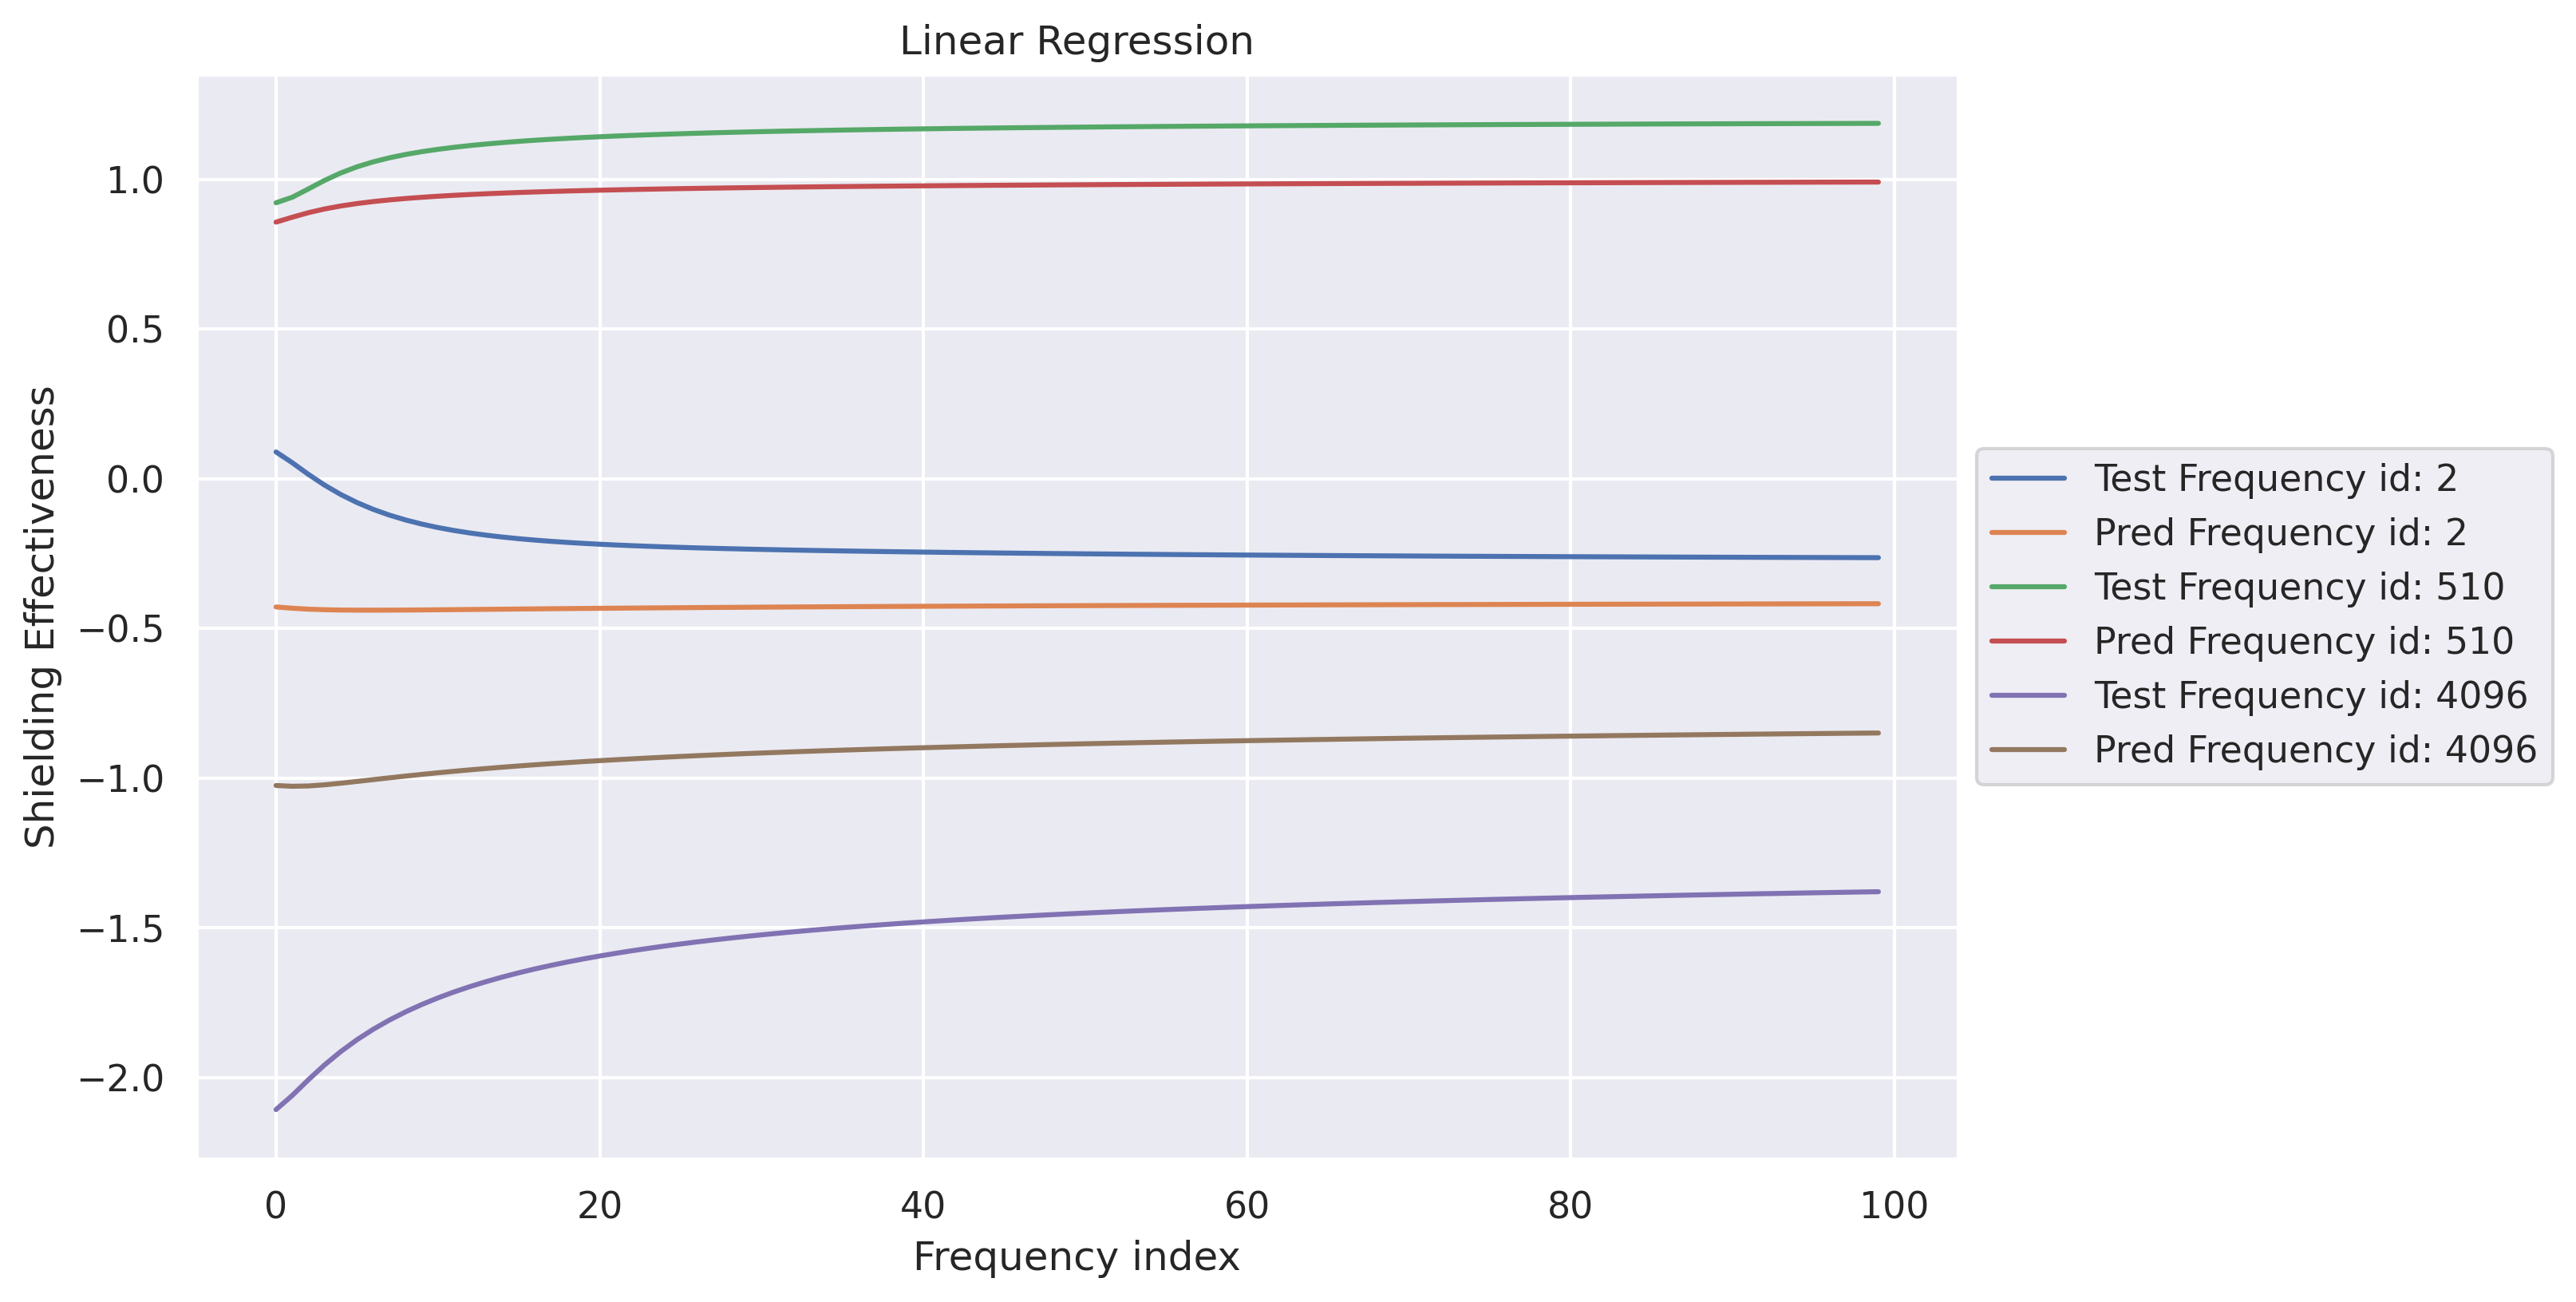

RMSE: 0.622 
Mean Absolute Error: 0.612 


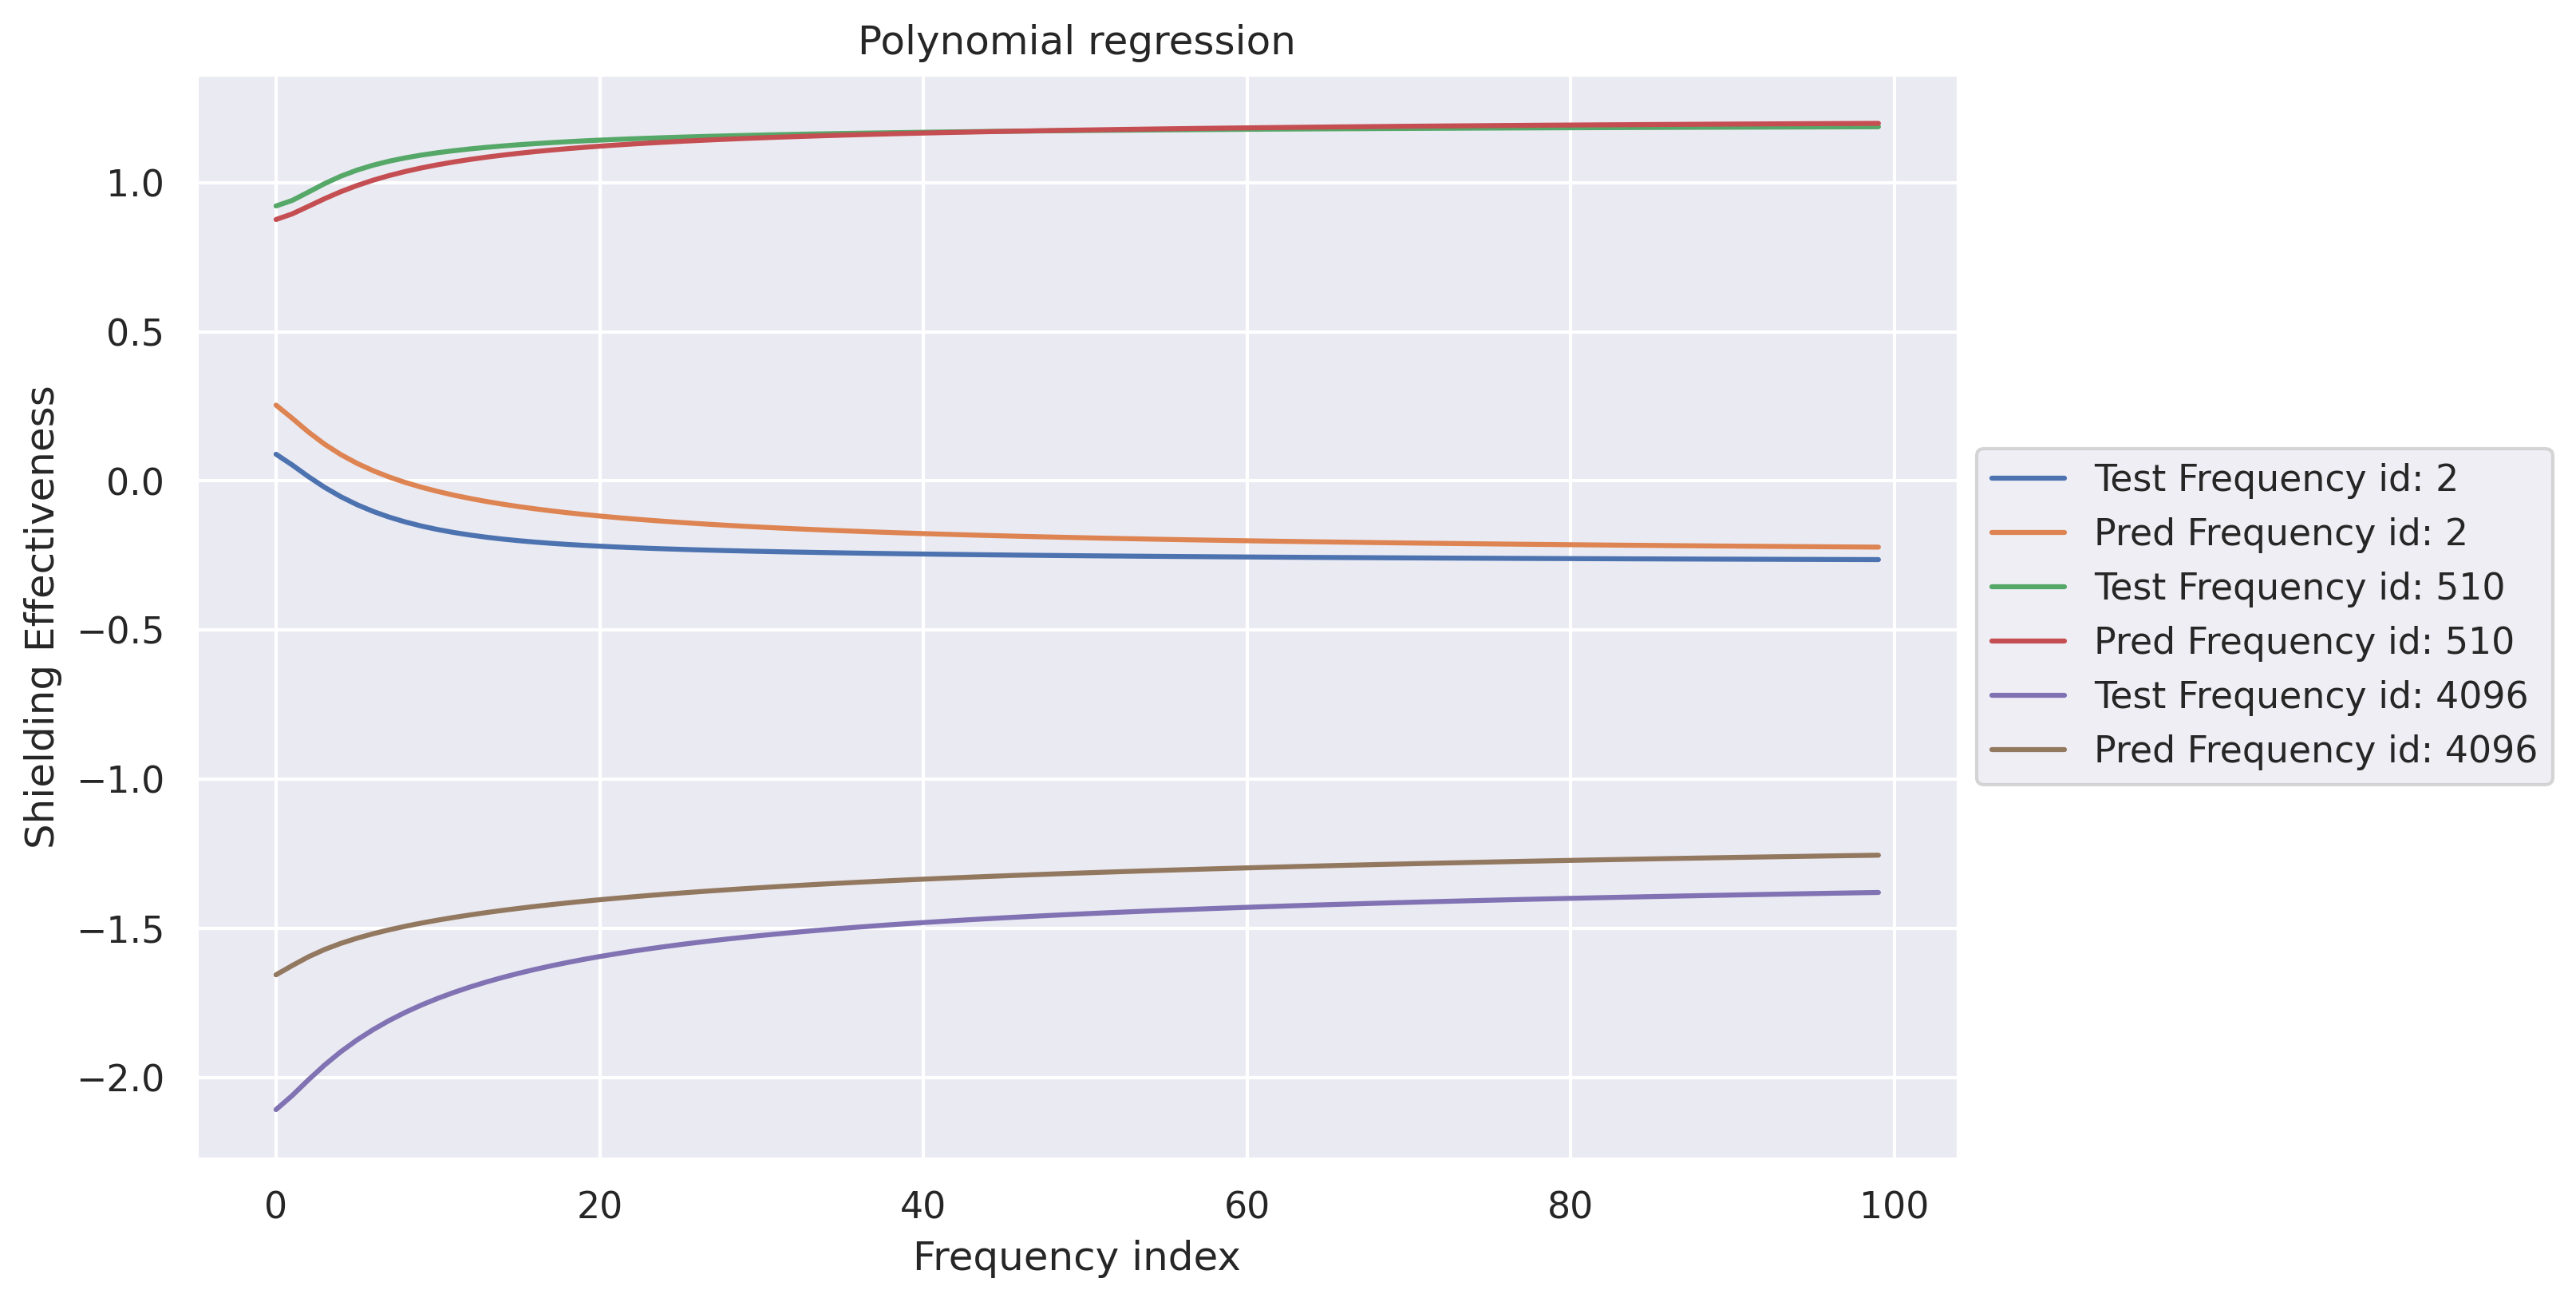

RMSE: 0.184 
Mean Absolute Error: 0.170 


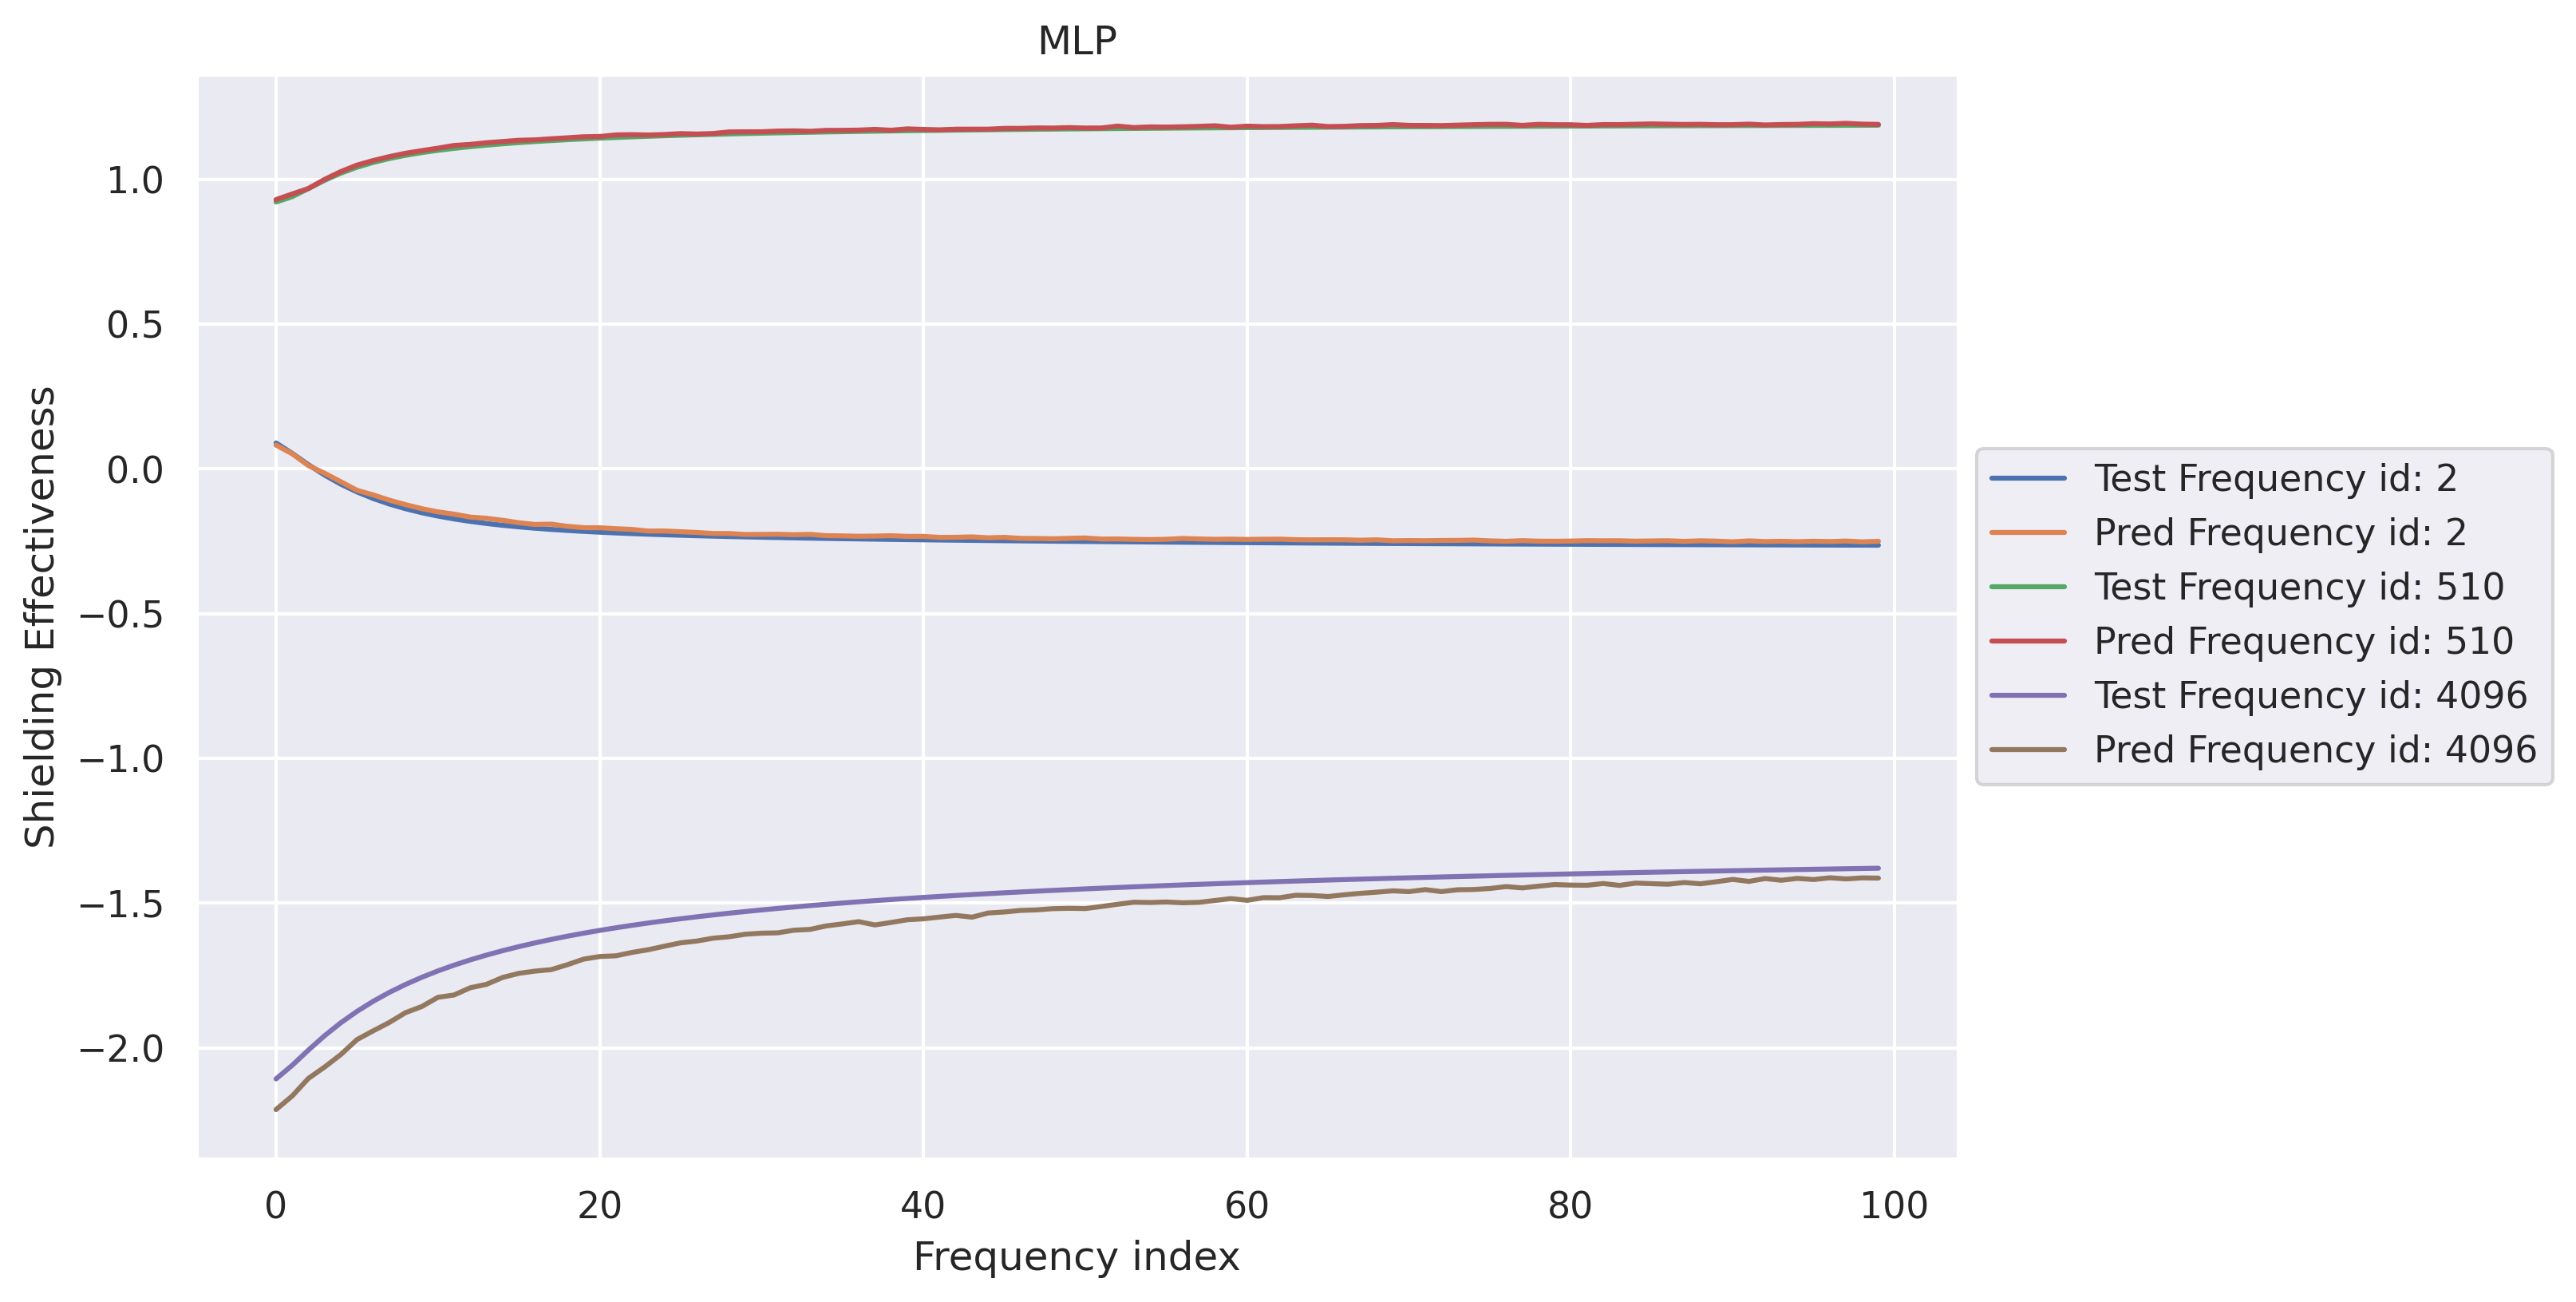

RMSE: 0.070 
Mean Absolute Error: 0.066 


In [16]:
# Linear regression
pipe_lr = make_pipeline(LinearRegression())
lr_clf_model = pipe_lr.fit(X_train, y_train)
train_plot(lr_clf_model, X_test, y_test, "Linear Regression")

# Polynomial regression (degree 3)
Input = [('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe_pr = Pipeline(Input)
pr_clf_model = pipe_pr.fit(X_train, y_train)
train_plot(pr_clf_model, X_test, y_test, "Polynomial regression")

# Multi-layer perceptron
pipe_mlp = make_pipeline(MLPRegressor(hidden_layer_sizes=30, activation='relu',random_state=0))
mlp_clf_model = pipe_mlp.fit(X_train, y_train)
train_plot(mlp_clf_model, X_test, y_test, "MLP")



Text(0.5, 1.0, 'Polynomial Regression')

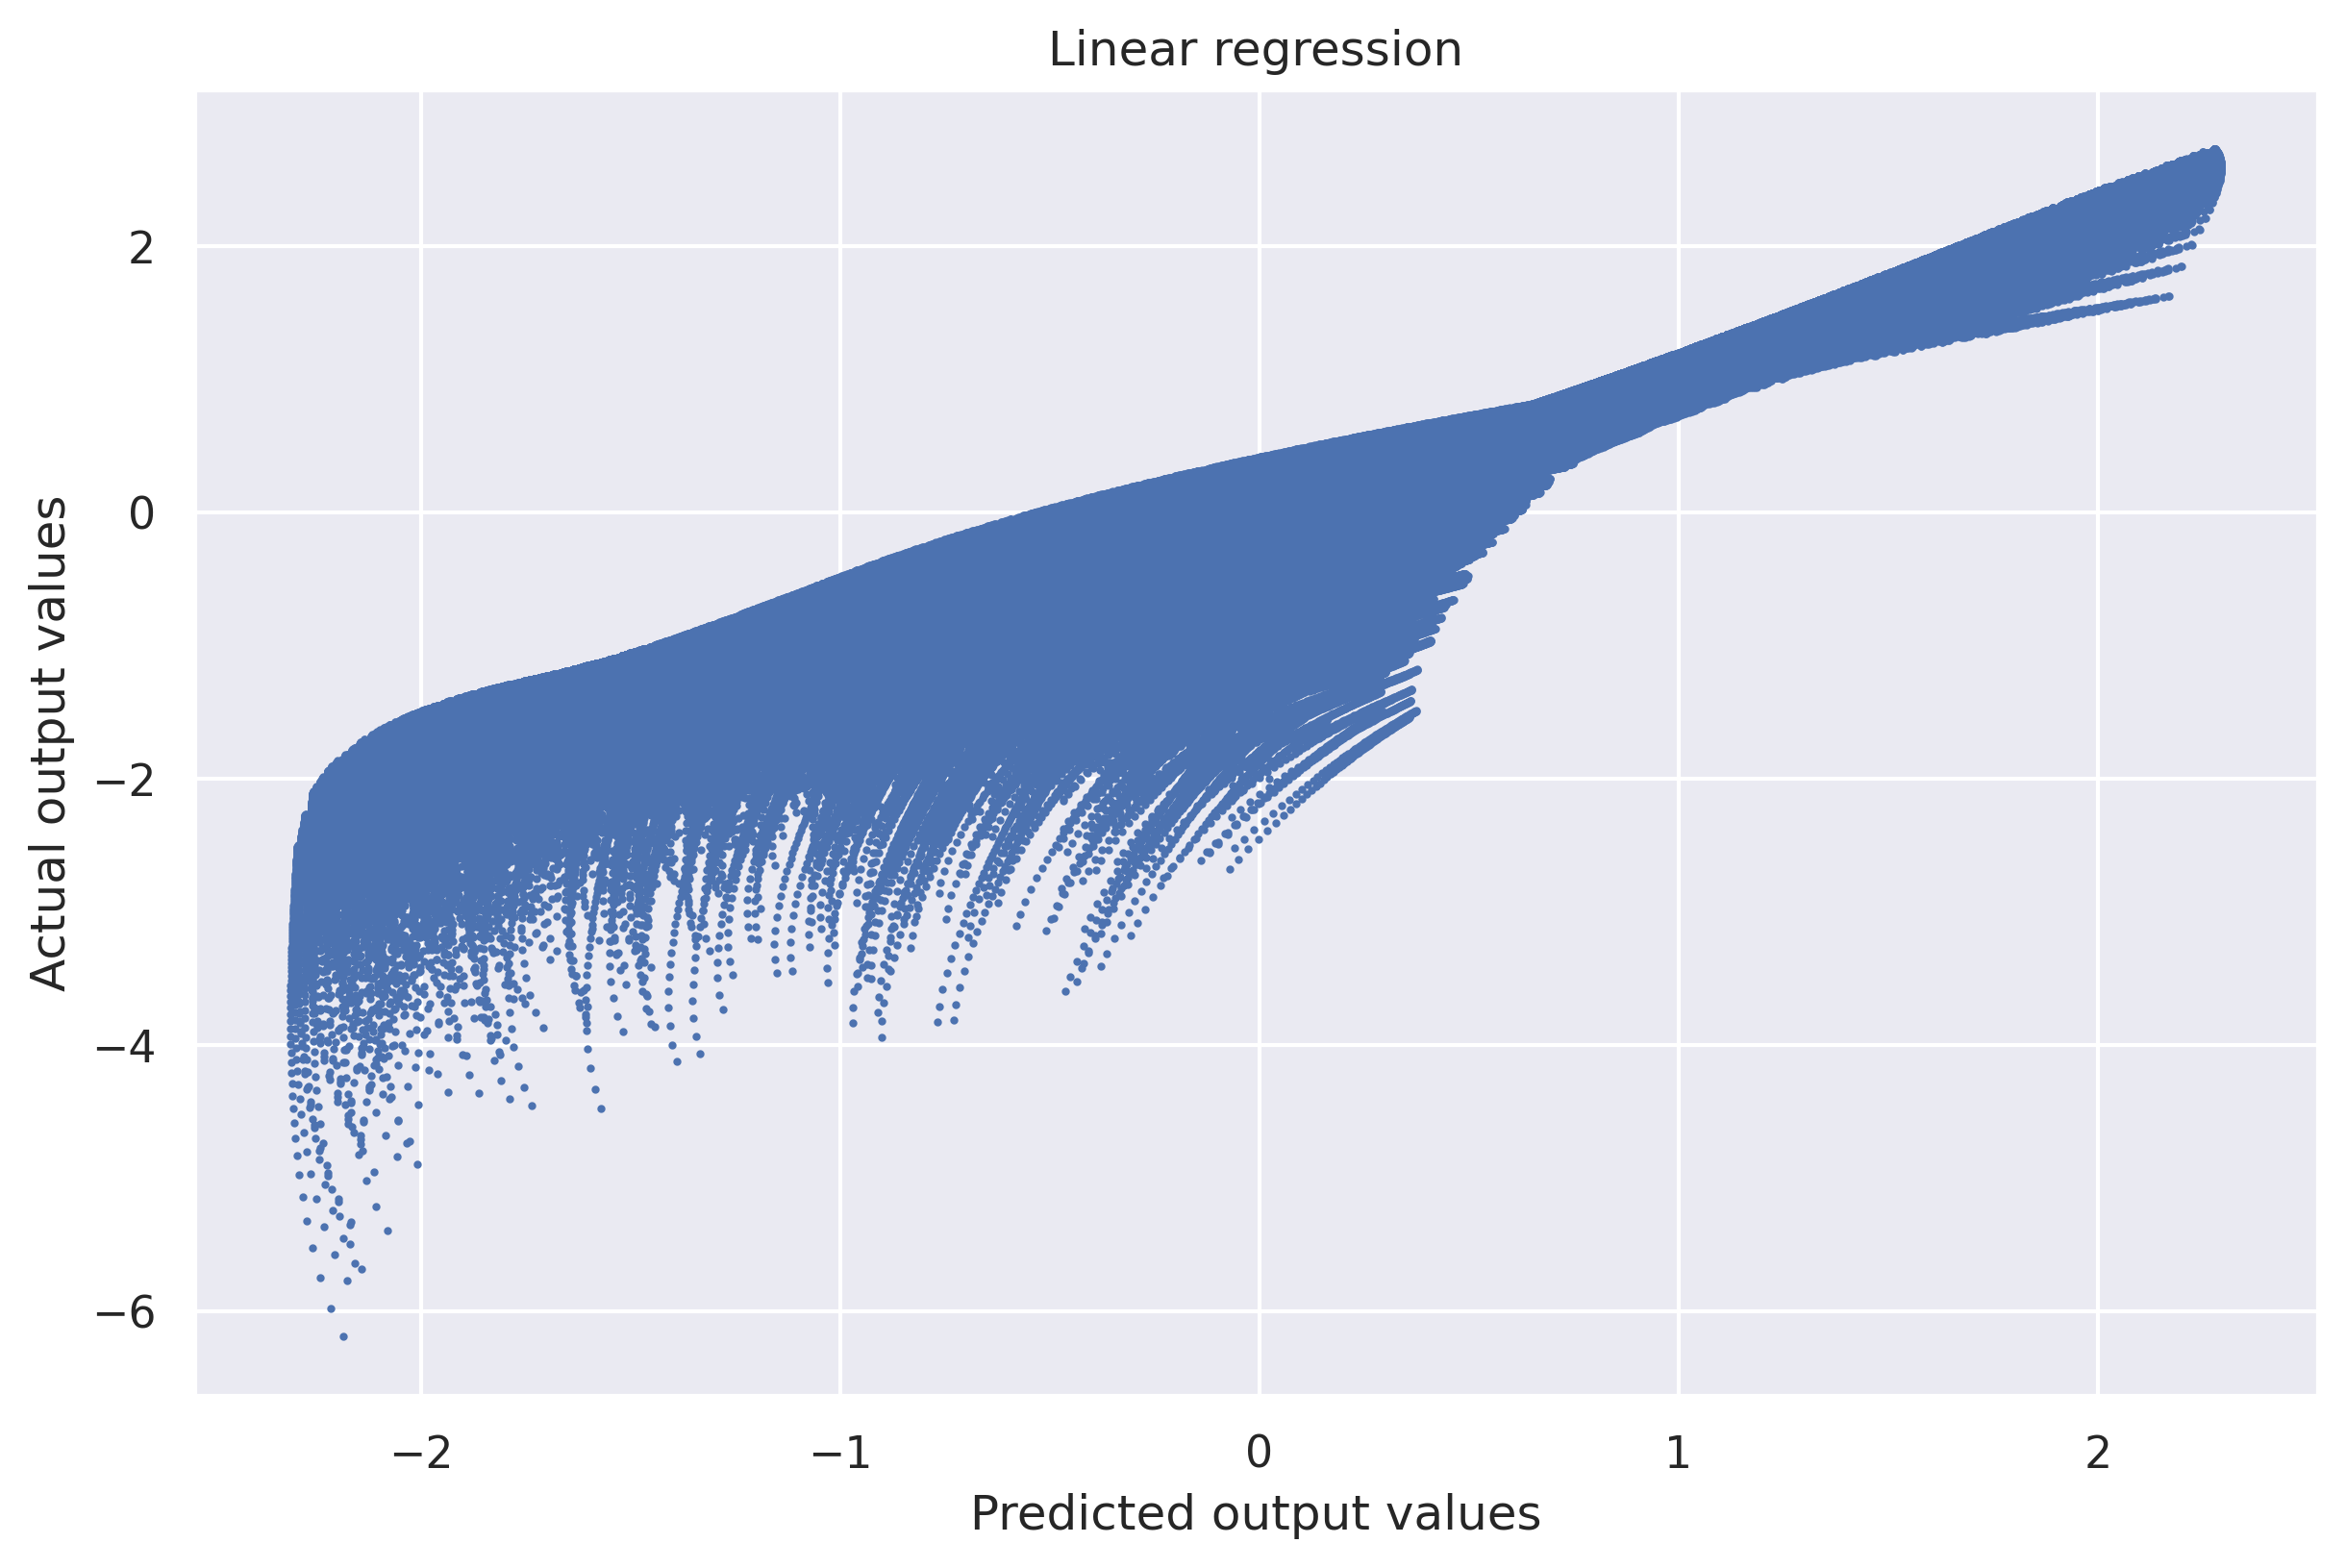

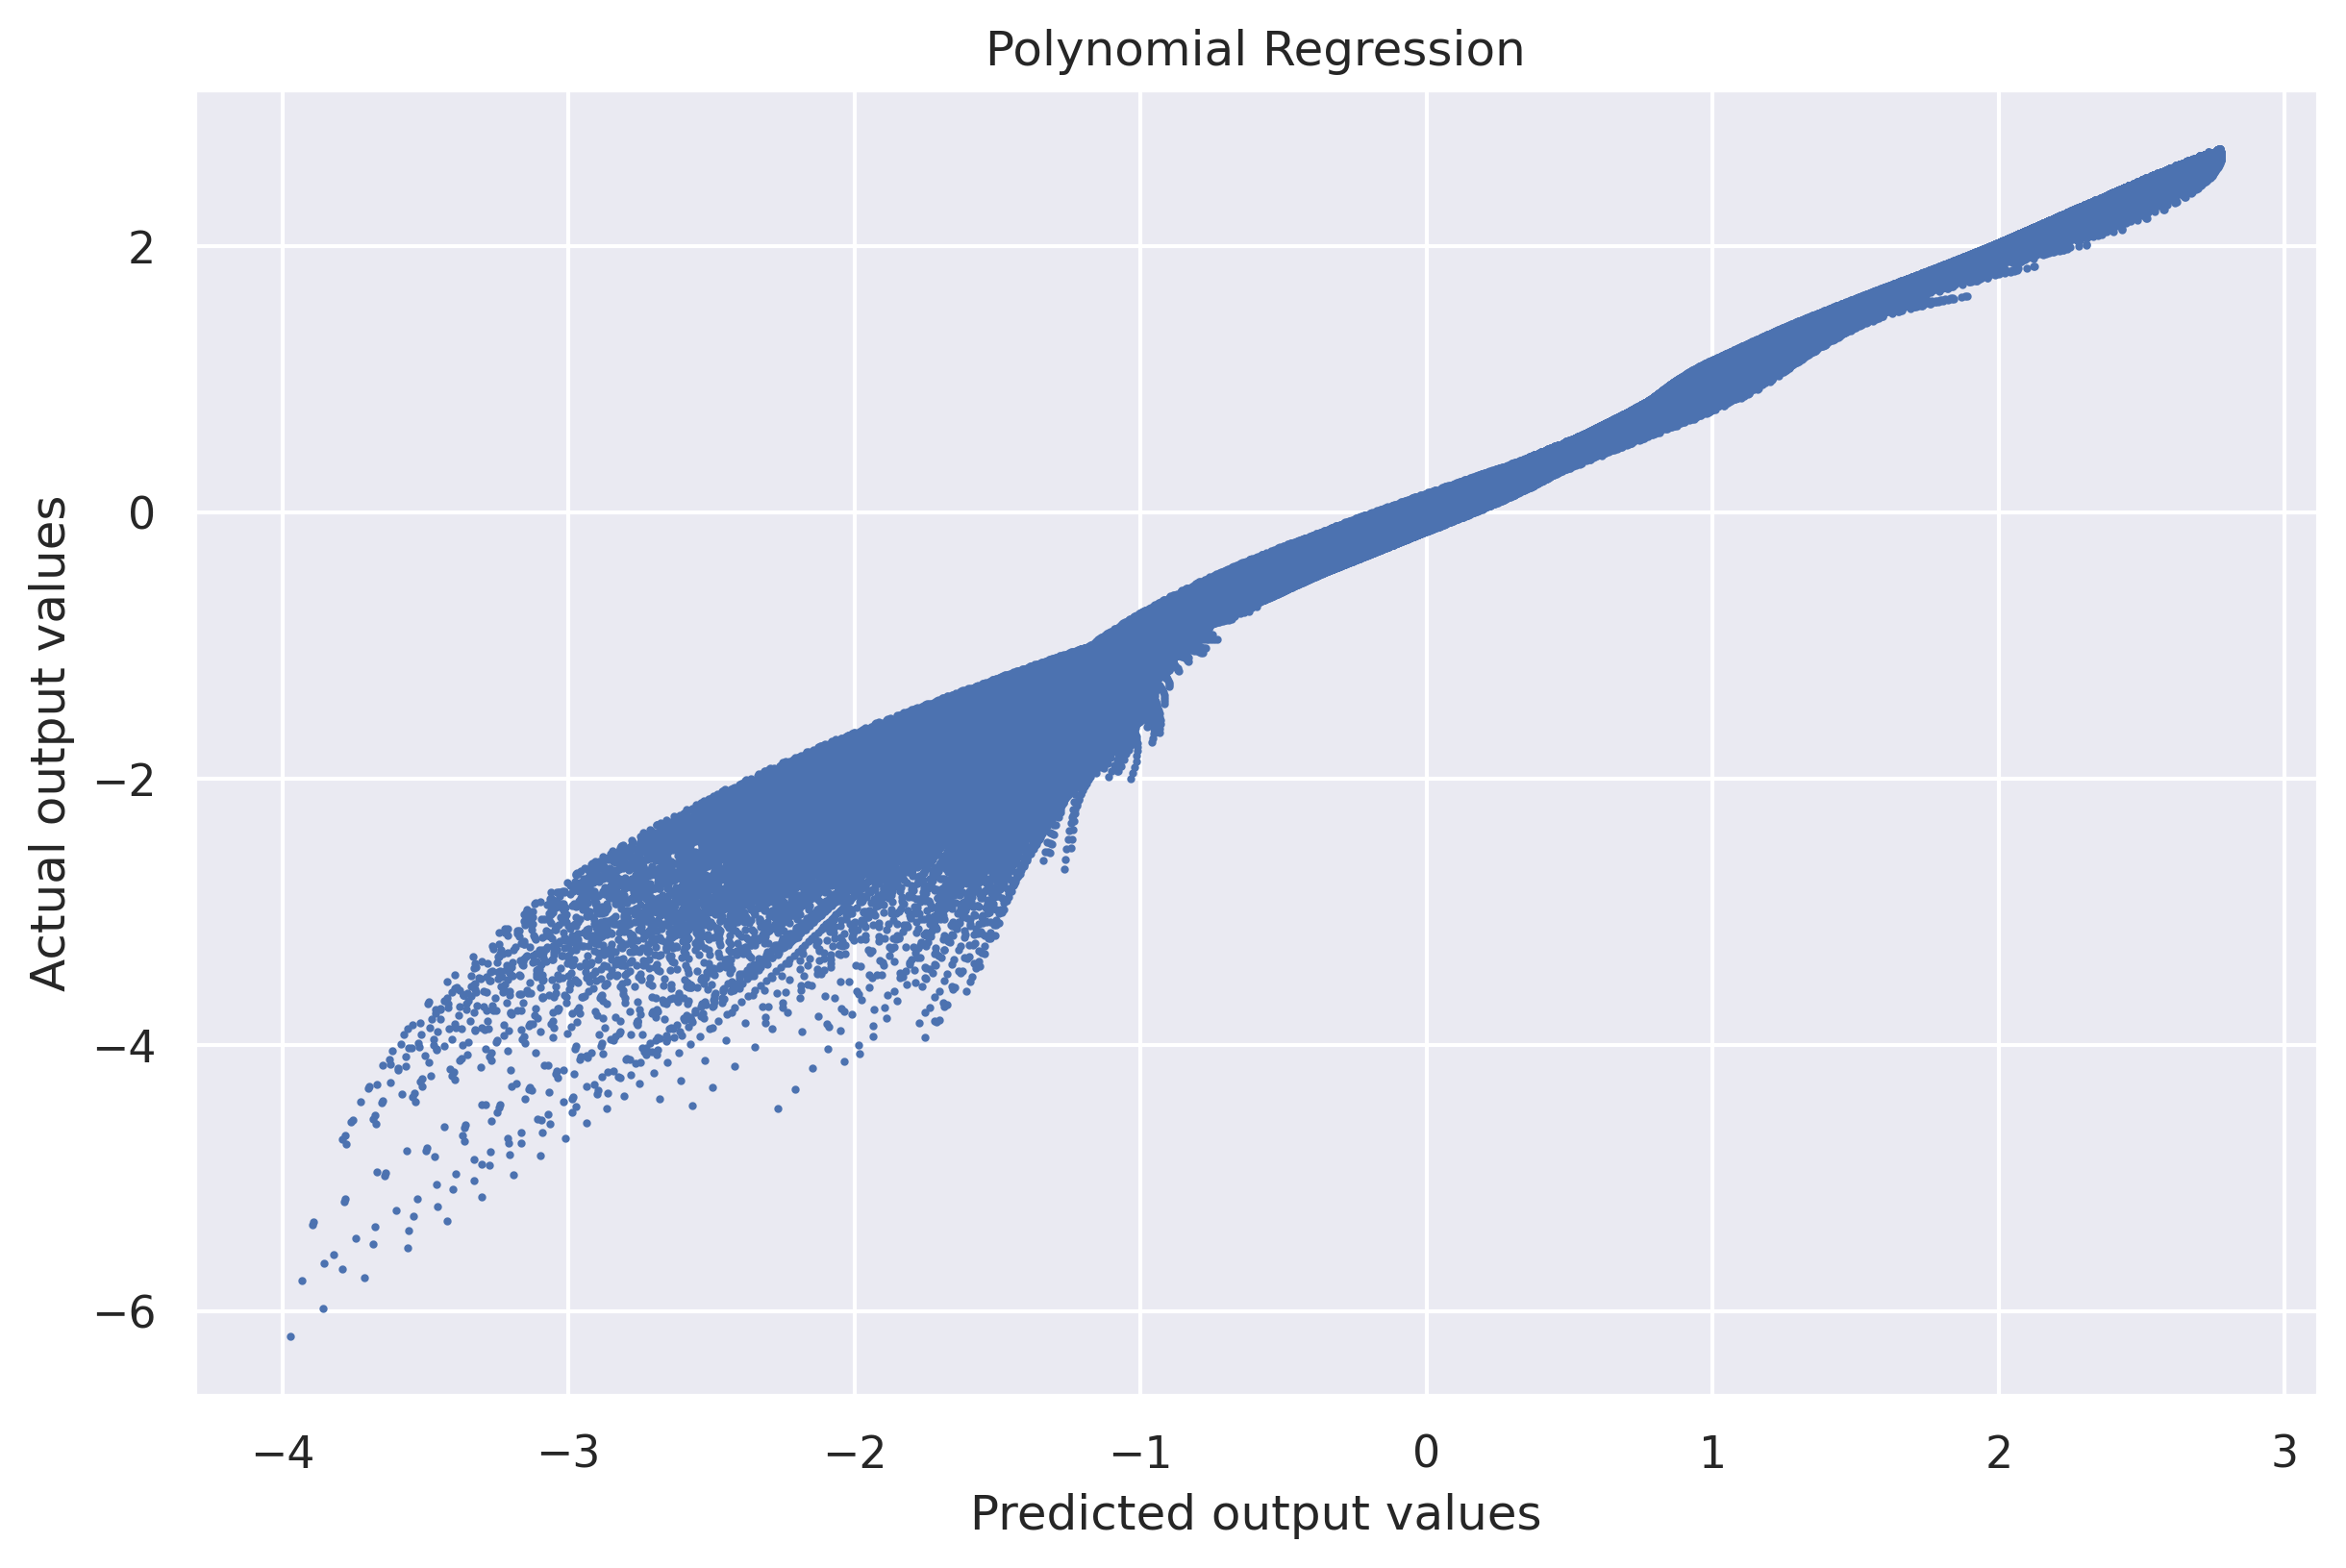

In [18]:
## Scatter plot
# Linear regression
plt.figure(num=None, figsize=(9.5, 6), dpi=300, facecolor='w', edgecolor='k')
y_test_pred = lr_clf_model.predict(X_test)
plt.scatter(y_test_pred, y_test, s=1)
plt.xlabel("Predicted output values"), plt.ylabel("Actual output values")
plt.title("Linear regression")

# Linear regression
plt.figure(num=None, figsize=(9.5, 6), dpi=300, facecolor='w', edgecolor='k')
y_test_pred = pr_clf_model.predict(X_test)
plt.scatter(y_test_pred, y_test, s=1)
plt.xlabel("Predicted output values"), plt.ylabel("Actual output values")
plt.title("Polynomial Regression")


**Comment on the accuracy and performance of each model. Explicitly describe
the metrics you use to determine accuracy. Which model is the better option?**


I plan to use RMSE values computed above to determine the model accuracy. It must keep in mind that in this question we did not train ***CLASSIFIER***, but ***REGRESSION*** models. Hence metrics like F1, recall or ROC can't be used.
Following are the RMSE value:

- Linear regression: `0.622` 

- Polynomial regression: `0.184` 

- Multi layer perceptron: `0.070` 


Apart from this I also computed mean absolute error (MAE). While RMSE computes the root of sum of square of error, MAE computes the sum of absolute value of error. It is a more direct representation of sum of error terms.
Following are the MAE value:

- Linear regression: `0.612`

- Polynomial regression: `0.170`

- Multi layer perceptron: `0.066`

Hence from above error metrics, I conclude that multi-layer perceptron is the most suitable option for this dataset.

Referenc: https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b